
a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 


In [94]:
import pandas as pd

In [96]:
df = pd.read_excel('2019 Winter Data Science Intern Challenge Data Set.xlsx')

In [98]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


In [100]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


An order_amount max of 704000 looks really high at this stage. Let us explore further

<AxesSubplot:>

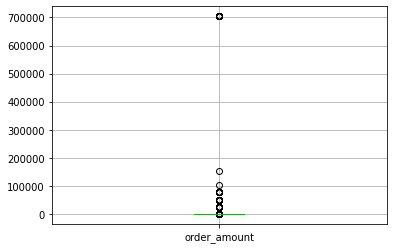

In [102]:
df.boxplot(column='order_amount')

In [104]:
df.sort_values(by='order_amount',axis=0,ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
691,692,78,878,154350,6,debit,2017-03-27 22:51:43.203
2492,2493,78,834,102900,4,debit,2017-03-04 04:37:33.848
3403,3404,78,928,77175,3,debit,2017-03-16 09:45:04.544
2564,2565,78,915,77175,3,debit,2017-03-25 01:19:35.410
4715,4716,78,818,77175,3,debit,2017-03-05 05:10:43.633
...,...,...,...,...,...,...,...
1843,1844,92,987,90,1,debit,2017-03-06 07:01:09.439
4219,4220,92,747,90,1,credit_card,2017-03-25 20:16:57.851
3363,3364,92,730,90,1,credit_card,2017-03-11 23:20:31.493
322,323,92,783,90,1,debit,2017-03-08 03:49:15.321


There seems to be an issue with shop_id == 42, let us explore that.

In [106]:
df[df['shop_id']==42].sort_values(by='order_amount',axis=0,ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at


A similar transaction is made on the same time on days, hence I think it would be better to ignore that as an anomaly and also any other transactions which may have the same pattern. Thus we should remove these outliers from our data 

In [108]:
df = df[(df['shop_id']!=42) & (df['order_amount']!=704000)]

In [110]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4949.000000,4949.000000,4949.000000,4949.000000,4949.000000
mean,2501.103657,50.162053,850.025056,754.791675,1.994948
std,1443.233931,29.143562,86.847043,5332.231644,0.982967
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1249.000000,24.000000,776.000000,163.000000,1.000000
50%,2504.000000,51.000000,850.000000,284.000000,2.000000
75%,3750.000000,75.000000,925.000000,390.000000,3.000000
max,5000.000000,100.000000,999.000000,154350.000000,8.000000


Now we see that the max order amount is 154350, let us examine this.

In [112]:
df.sort_values(by='order_amount',axis=0,ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
691,692,78,878,154350,6,debit,2017-03-27 22:51:43.203
2492,2493,78,834,102900,4,debit,2017-03-04 04:37:33.848
3538,3539,43,830,1086,6,debit,2017-03-17 19:56:29.343
4141,4142,54,733,1064,8,debit,2017-03-07 17:05:17.910
3077,3078,89,754,980,5,debit,2017-03-13 05:27:58.312
...,...,...,...,...,...,...,...
4932,4933,92,823,90,1,credit_card,2017-03-24 02:17:12.909
4219,4220,92,747,90,1,credit_card,2017-03-25 20:16:57.851
322,323,92,783,90,1,debit,2017-03-08 03:49:15.321
2503,2504,92,935,90,1,credit_card,2017-03-28 02:30:25.553


In [114]:
df[(df['order_amount'] == 154250)| (df['order_amount'] == 102900) | (df['order_amount'] ==77175) | (df['order_amount'] ==51450) | (df['order_amount'] ==25725)].sort_values(by='order_amount',axis=0,ascending=False)['order_amount'].value_counts()

102900    1
Name: order_amount, dtype: int64

Since 25725, 51450, 77175 seem repeated we should discard them as well as I feel like they are outliers


In [115]:
df = df[(df['order_amount'] != 25725) & (df['order_amount'] != 51450) & (df['order_amount'] !=77175)]

In [116]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000
mean,2499.214679,49.912334,849.861366,352.479918,1.996942
std,1444.157285,29.153942,86.871452,2647.132809,0.984479
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1246.000000,24.000000,776.000000,163.000000,1.000000
50%,2498.000000,50.000000,850.000000,284.000000,2.000000
75%,3750.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,154350.000000,8.000000


Hence we removed 95 obervations from the Data, and we have landed to the observation that the AOV is now 352.48 which is a much better value. 

b. What metric would you report for this dataset?


Another way to evaluate this data would be to check the median, as it has stayed constant before and after removing the outliers which is 284. Median is a more robust statistic and is not affected by outliers unlike mean. Hence, I would report median as a metric for this data.

c. What is its value?


The median for this data is 284 as seen in the table above